<a href="https://colab.research.google.com/github/Anniemuthoni6/Introduction-To-Git-Hub/blob/main/CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [390]:
import pandas as pd  # Import pandas for data manipulation
import numpy as np  # Import numpy for numerical operations
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder for encoding categorical variables
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting datasets

In [391]:
# Load specific sheets from an Excel file
file_path = 'Consumption_headline_EW_2022.xlsx'
sheet_names = ['Table_4',  'Table_8', 'Table_16']  # Specify the sheets to load

# Read each specified sheet, skipping the first 6 rows and using the 7th row as header
dataframes = {sheet: pd.read_excel(file_path, sheet_name=sheet, header=6) for sheet in sheet_names}

In [392]:
# Display the first few rows of each DataFrame to inspect the raw data
for sheet, df in dataframes.items():
    print(f"Raw DataFrame for {sheet}:")
    print(df.head(10))  # Display the first 10 rows of the DataFrame
    print("\n")

Raw DataFrame for Table_4:
   Year       1        2        3       4  5 or more    Unknown  \
0  2005  278770   821760  1448730  350750      80820      15650   
1  2006  315710   935830  1636560  394470      89730      17340   
2  2007  317910   940570  1634110  395740      89910      17300   
3  2008  320440   945140  1633770  396530      90150      17350   
4  2009  322050   951340  1644630  399530      90820      17430   
5  2010  325490   960850  1659470  402860      91730      17630   
6  2011  345500   983530  1690800  413990      94950  [no data]   
7  2012  341160   974170  1677650  411190      93990  [no data]   
8  2013  388110  1117960  1937890  455950      98250  [no data]   
9  2014  342800  1067210  1900310  441050      94810  [no data]   

   All dwellings  Unnamed: 8  Year.1  ...  All dwellings.1  Unnamed: 17  \
0        2996480         NaN    2005  ...             4600          NaN   
1        3389650         NaN    2006  ...             4500          NaN   
2        3

In [393]:
# Function to extract up to three tables from a DataFrame
def extract_tables(df):
    # Identify the columns that are not completely empty
    non_empty_columns = df.columns[df.notna().any()].tolist()

    # Initialize a list to hold the extracted tables
    tables = []

    # Iterate through the non-empty columns to find tables
    start_col = 0
    for col in non_empty_columns:
        # Check if the current column is empty
        if pd.isna(df[col]).all():
            continue  # Skip empty columns

        # Find the end of the current table (next empty column)
        end_col = start_col
        while end_col < len(df.columns) and not pd.isna(df.iloc[:, end_col]).all():
            end_col += 1

        # Extract the current table
        table = df.iloc[:, start_col:end_col]
        tables.append(table)

        # Stop extraction after the third table
        if len(tables) >= 3:
            break

        # Move to the next column after the empty one
        start_col = end_col + 1

    return tables

# Extract tables from each DataFrame
extracted_tables = {}
for sheet, df in dataframes.items():
    tables = extract_tables(df)
    extracted_tables[sheet] = tables  # Store extracted tables in a dictionary

In [394]:
# Function to construct new table names
def construct_table_name(sheet, index):
    return f"Table_{sheet.split('_')[-1]}{chr(96 + index)}"  # e.g., Table_16, Table_16a, etc.

In [395]:
# Display and rename the extracted tables with context
for sheet, tables in extracted_tables.items():
    # Highlight the main table heading
    if  sheet == "Table_4":
        print(f"{sheet}: Electricity consumption by number of bedrooms")

    elif sheet == "Table_8":
        print(f"{sheet}: Electricity consumption by property age")

    elif sheet == "Table_16":
        print(f"{sheet}: Electricity consumption by country and region")

    # Print a newline for better readability
    print()

    # Now display the sub-tables
    for i in range(len(tables)):
        table = tables[i]  # Access each table by index

        # Construct the new table name using the function
        new_table_name = construct_table_name(sheet, i + 1)  # i + 1 for 1-based index

        # Print the sub-table name with context
        if sheet == "Table_4":
          if i == 0:
                print(f"{new_table_name}: Number of dwellings in sample by number of bedrooms")  # Table 4a
          elif i == 1:
                print(f"{new_table_name}: Mean electricity consumption (kWh) by number of bedrooms")  # Table 4b
          elif i == 2:
                print(f"{new_table_name}: Median electricity consumption (kWh) by number of bedrooms")  # Table 4c

        elif sheet == "Table_8":
          if i == 0:
                print(f"{new_table_name}: Number of dwellings in sample by number of bedrooms")  # Table 8a
          elif i == 1:
                print(f"{new_table_name}: Mean electricity consumption (kWh) by number of bedrooms")  # Table 8b
          elif i == 2:
                print(f"{new_table_name}: Median electricity consumption (kWh) by number of bedrooms")  # Table 8c



        elif sheet == "Table_16":
            if i == 0:
                print(f"{new_table_name}: Number of dwellings in sample by number of bedrooms")  # Table 16a
            elif i == 1:
                print(f"{new_table_name}: Mean electricity consumption (kWh) by number of bedrooms")  # Table 16b
            elif i == 2:
                print(f"{new_table_name}: Median electricity consumption (kWh) by number of bedrooms")  # Table 16c

        # Print the entire table for verification
        print(table)  # Display the entire table
        print("\n")  # Print a newline for better readability

Table_4: Electricity consumption by number of bedrooms

Table_4a: Number of dwellings in sample by number of bedrooms
    Year        1        2         3        4  5 or more    Unknown  \
0   2005   278770   821760   1448730   350750      80820      15650   
1   2006   315710   935830   1636560   394470      89730      17340   
2   2007   317910   940570   1634110   395740      89910      17300   
3   2008   320440   945140   1633770   396530      90150      17350   
4   2009   322050   951340   1644630   399530      90820      17430   
5   2010   325490   960850   1659470   402860      91730      17630   
6   2011   345500   983530   1690800   413990      94950  [no data]   
7   2012   341160   974170   1677650   411190      93990  [no data]   
8   2013   388110  1117960   1937890   455950      98250  [no data]   
9   2014   342800  1067210   1900310   441050      94810  [no data]   
10  2015   331290  1026480   1832970   439270      94360  [no data]   
11  2016   365130  1111270   1

In [396]:
# Assess data quality for each extracted table
def assess_data_quality(extracted_tables):
    for sheet, tables in extracted_tables.items():
        for i, table in enumerate(tables, start=1):
            # Construct the new table name using the function
            new_table_name = construct_table_name(sheet, i)
            print(f"Data Quality Assessment for {new_table_name}:")  # Print the current table name

            # Display information about the DataFrame (data types, non-null counts)
            print("\nDataFrame Info:")
            print(table.info())

            # Show summary statistics for numerical columns
            print("\nSummary Statistics:")
            print(table.describe())

            # Check for missing values in each column
            print("\nMissing Values Count:")
            print(table.isnull().sum())

            # Additional checks (e.g., unique values in categorical columns)
            print("\nUnique Values Count:")
            for col in table.select_dtypes(include=['object']).columns:
                print(f"{col}: {table[col].nunique()} unique values")

            # Additional data quality checks (e.g., data types)
            print("\nData Types:")
            print(table.dtypes)

            print("\n" + "="*50 + "\n")  # Separator for better readability

# Call the function to assess data quality
assess_data_quality(extracted_tables)

Data Quality Assessment for Table_4a:

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           18 non-null     int64 
 1   1              18 non-null     int64 
 2   2              18 non-null     int64 
 3   3              18 non-null     int64 
 4   4              18 non-null     int64 
 5   5 or more      18 non-null     int64 
 6   Unknown        18 non-null     object
 7   All dwellings  18 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 1.2+ KB
None

Summary Statistics:
              Year             1             2             3             4  \
count    18.000000  1.800000e+01  1.800000e+01  1.800000e+01  1.800000e+01   
mean   2013.500000  9.918622e+05  2.780046e+06  4.630639e+06  1.239057e+06   
std       5.338539  9.597302e+05  2.611765e+06  4.240914e+06  1.199770e+06   
min    2005.000000  2.787

In [397]:
# Handle missing values after data quality assessment
for sheet, tables in extracted_tables.items():
    for i, table in enumerate(tables, start=1):
        # Replace '[no data]' with 0
        table.replace('[no data]', 0, inplace=True)

        # Construct the new table name for display using the construct_table_name function
        new_table_name = construct_table_name(sheet, i)  # e.g., Table_16, Table_16a, etc.

        # Print the updated data quality assessment after handling missing values
        print(f"Updated Data  for {new_table_name} after handling missing values:")
        print(table.head(10))  # Display the first 10 rows of the updated table
        print("\n" + "="*50 + "\n")  # Print a separator for better readability

Updated Data  for Table_4a after handling missing values:
   Year       1        2        3       4  5 or more  Unknown  All dwellings
0  2005  278770   821760  1448730  350750      80820    15650        2996480
1  2006  315710   935830  1636560  394470      89730    17340        3389650
2  2007  317910   940570  1634110  395740      89910    17300        3395530
3  2008  320440   945140  1633770  396530      90150    17350        3403390
4  2009  322050   951340  1644630  399530      90820    17430        3425800
5  2010  325490   960850  1659470  402860      91730    17630        3458030
6  2011  345500   983530  1690800  413990      94950        0        3528760
7  2012  341160   974170  1677650  411190      93990        0        3498160
8  2013  388110  1117960  1937890  455950      98250        0        3998160
9  2014  342800  1067210  1900310  441050      94810        0        3846180


Updated Data  for Table_4b after handling missing values:
   Year.1   1.1   2.1   3.1   4.1  

<ipython-input-397-8820a4c7af9d>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  table.replace('[no data]', 0, inplace=True)
<ipython-input-397-8820a4c7af9d>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  table.replace('[no data]', 0, inplace=True)
<ipython-input-397-8820a4c7af9d>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_

In [398]:
# Perform data reduction to include only years from 2011 to 2022
for sheet, tables in extracted_tables.items():
    for i in range(len(tables)):
        table = tables[i]  # Access each table by index

        # Identify the year column (assuming it starts with 'Year')
        year_column = [col for col in table.columns if 'Year' in col]

        if year_column:  # Check if any year column is found
            # Filter the table to include only rows where the year is between 2011 and 2022
            filtered_table = table[(table[year_column[0]] >= 2011) & (table[year_column[0]] <= 2022)]

            # Construct the new table name for display
            new_table_name = f"Table_{sheet.split('_')[-1]}{chr(96 + (i + 1))}"  # e.g., Table_16a, Table_16b, etc.

            # Print the filtered table with context
            print(f"Data Reduction for {new_table_name} (Years 2011 to 2022):")
            print(filtered_table)  # Display the entire filtered table
            print("\n" + "="*50 + "\n")  # Print a separator for better readability
        else:
            print(f"No year column found in {sheet} - Table {i + 1}.")

Data Reduction for Table_4a (Years 2011 to 2022):
    Year        1        2         3        4  5 or more  Unknown  \
6   2011   345500   983530   1690800   413990      94950        0   
7   2012   341160   974170   1677650   411190      93990        0   
8   2013   388110  1117960   1937890   455950      98250        0   
9   2014   342800  1067210   1900310   441050      94810        0   
10  2015   331290  1026480   1832970   439270      94360        0   
11  2016   365130  1111270   1916570   484860     108930   124540   
12  2017  2240430  6234090  10330390  2778520     647000        0   
13  2018  2274900  6298130  10392720  2818350     654870        0   
14  2019  2276470  6295180  10366750  2834260     655500        0   
15  2020  2323710  6394210  10471920  2916270     680940        0   
16  2021  2348270  6467940  10580300  2952900     689680        0   
17  2022  2395380  6515170  10595970  3016530     706270        0   

    All dwellings  
6         3528760  
7         34

In [399]:
# Assuming extracted_tables is already defined and contains your data
output_directory = 'Filtered_Consumption_Data/'  # Specify the output directory

# Create the output directory if it does not exist
os.makedirs(output_directory, exist_ok=True)

# Perform data reduction to include only years from 2011 to 2022
for sheet, tables in extracted_tables.items():
    for i in range(len(tables)):
        table = tables[i]  # Access each table by index

        # Identify the year column (assuming it starts with 'Year')
        year_column = [col for col in table.columns if 'Year' in col]

        if year_column:  # Check if any year column is found
            # Filter the table to include only rows where the year is between 2011 and 2022
            filtered_table = table[(table[year_column[0]] >= 2011) & (table[year_column[0]] <= 2022)]

            # Construct the new table name for saving
            new_table_name = f"Table_{sheet.split('_')[-1]}{chr(96 + (i + 1))}.csv"  # e.g., Table_16a.csv

            # Save the filtered table to a CSV file
            filtered_table.to_csv(f"{output_directory}{new_table_name}", index=False)

            # Print the filtered table with context
            print(f"Data Reduction for {new_table_name} (Years 2011 to 2022):")
            print(filtered_table)  # Display the entire filtered table
            print("\n" + "="*50 + "\n")  # Print a separator for better readability
        else:
            print(f"No year column found in {sheet} - Table {i + 1}.")

Data Reduction for Table_4a.csv (Years 2011 to 2022):
    Year        1        2         3        4  5 or more  Unknown  \
6   2011   345500   983530   1690800   413990      94950        0   
7   2012   341160   974170   1677650   411190      93990        0   
8   2013   388110  1117960   1937890   455950      98250        0   
9   2014   342800  1067210   1900310   441050      94810        0   
10  2015   331290  1026480   1832970   439270      94360        0   
11  2016   365130  1111270   1916570   484860     108930   124540   
12  2017  2240430  6234090  10330390  2778520     647000        0   
13  2018  2274900  6298130  10392720  2818350     654870        0   
14  2019  2276470  6295180  10366750  2834260     655500        0   
15  2020  2323710  6394210  10471920  2916270     680940        0   
16  2021  2348270  6467940  10580300  2952900     689680        0   
17  2022  2395380  6515170  10595970  3016530     706270        0   

    All dwellings  
6         3528760  
7       

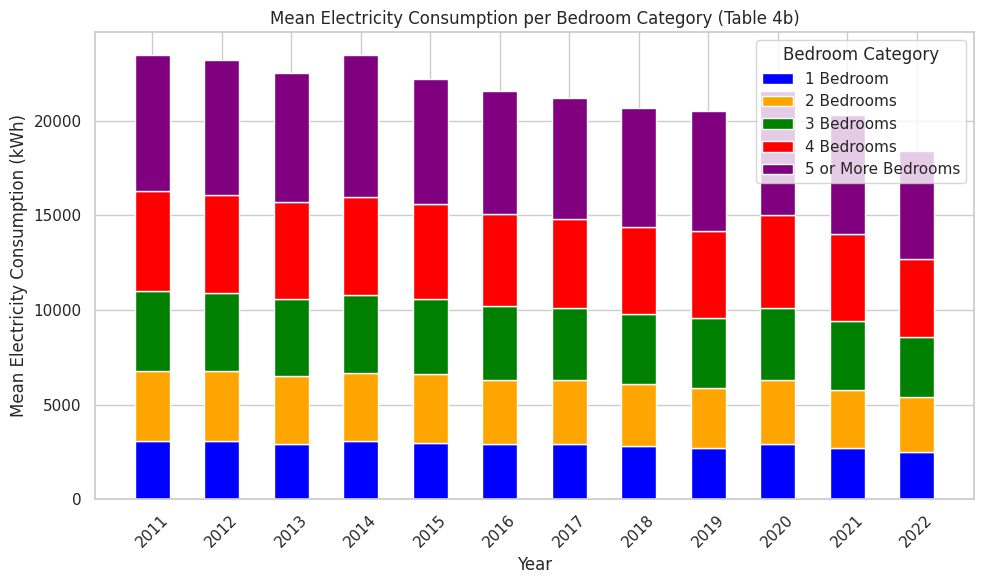

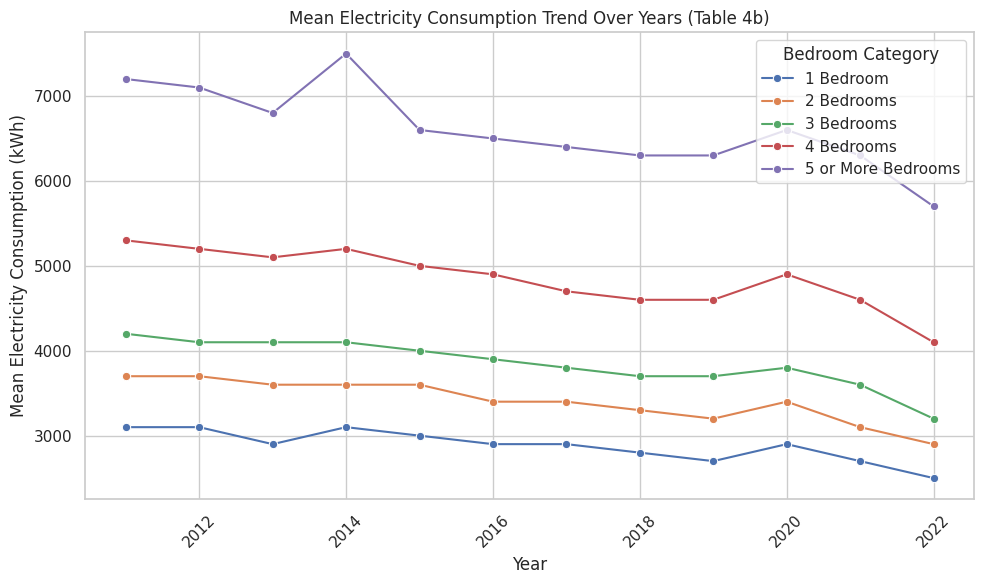

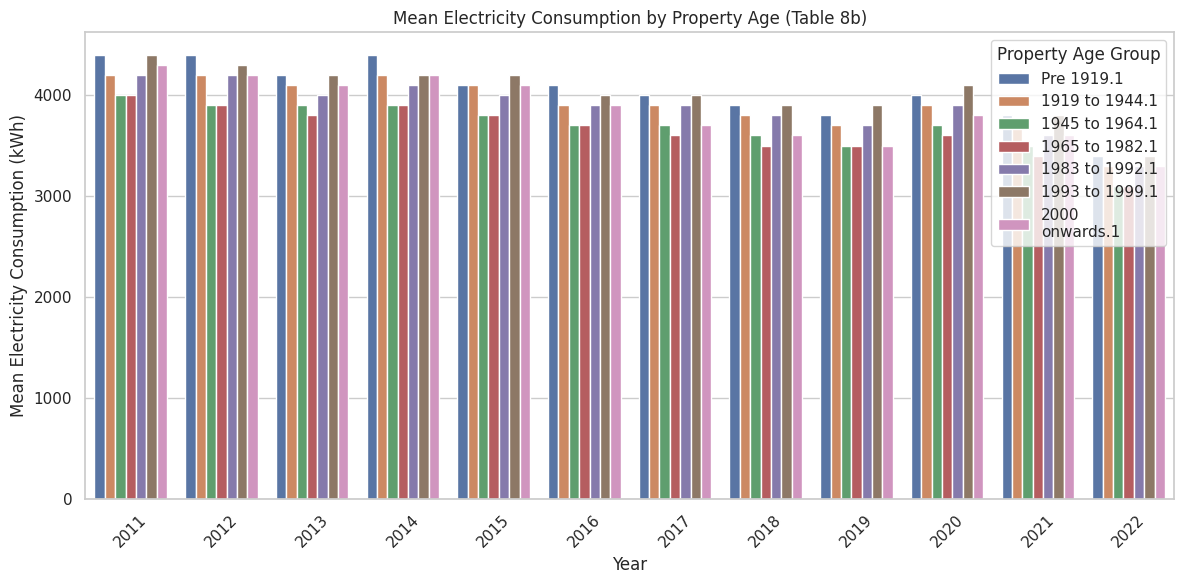

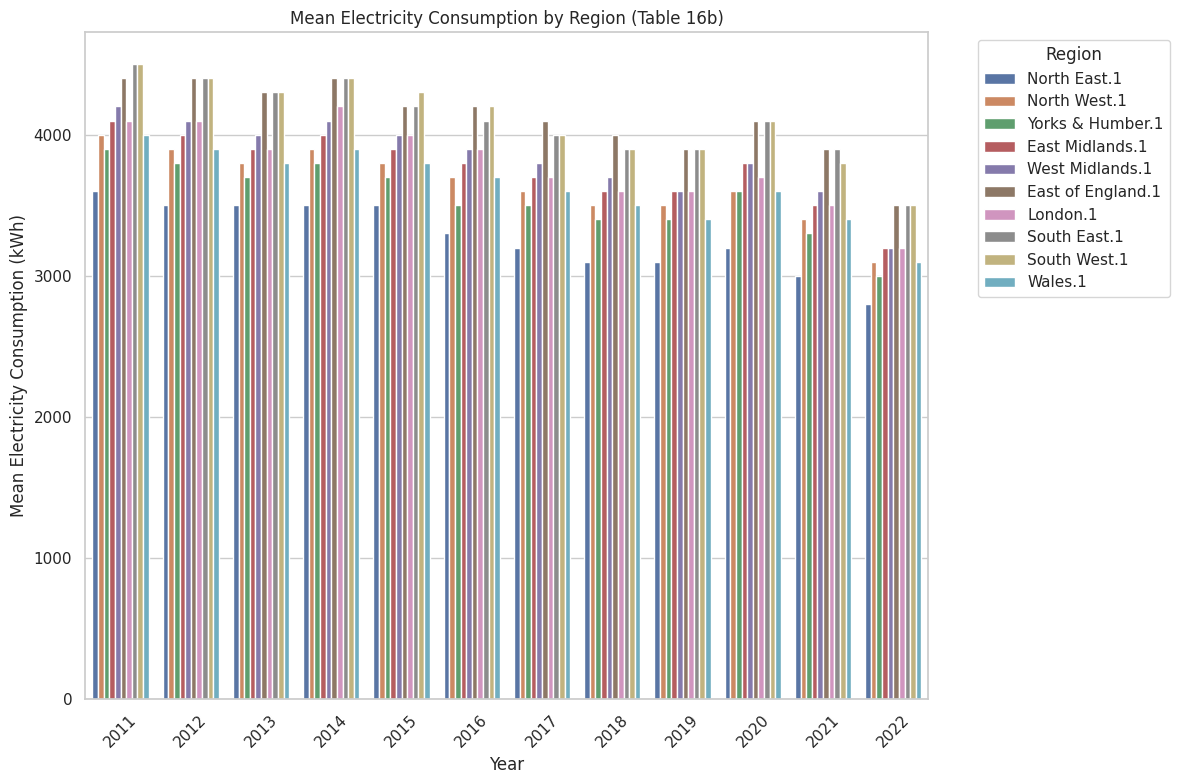

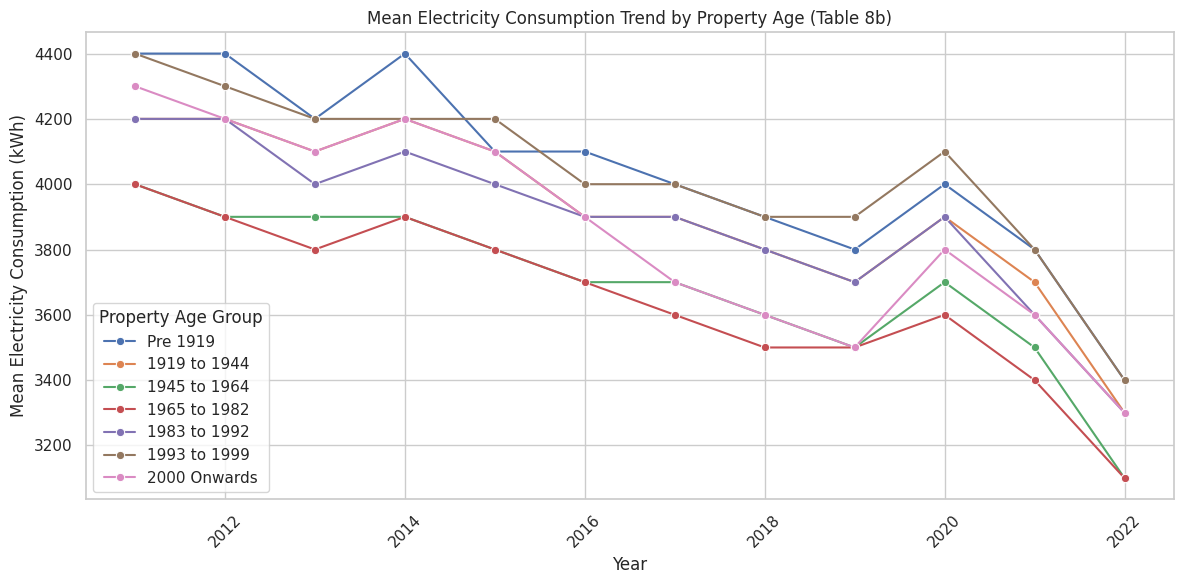

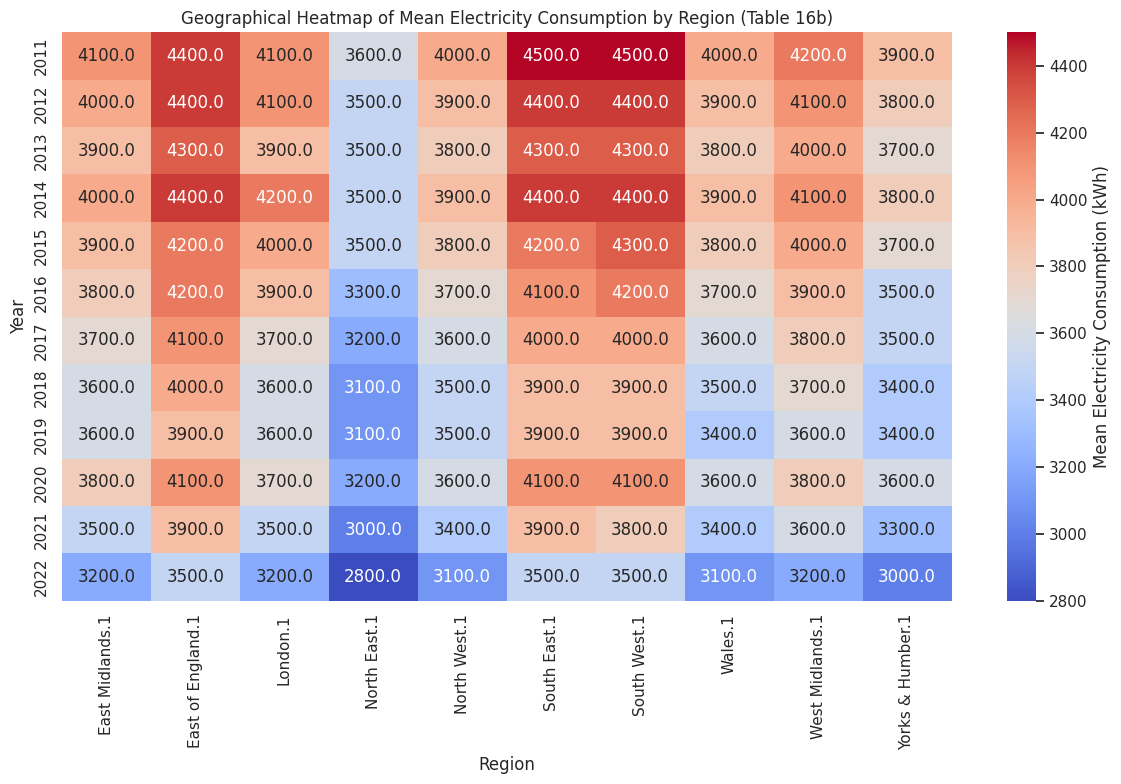

In [412]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Load the cleaned CSV files for each relevant table
table_4b = pd.read_csv('Filtered_Consumption_Data/Table_4b.csv')  # Mean electricity consumption by number of bedrooms
table_8b = pd.read_csv('Filtered_Consumption_Data/Table_8b.csv')  # Mean electricity consumption by property age
table_16b = pd.read_csv('Filtered_Consumption_Data/Table_16b.csv')  # Mean electricity consumption by region

# Visualizations

import numpy as np

# 1. Stacked Bar graph showing mean electricity consumption per bedroom category using Table 4b
plt.figure(figsize=(10, 6))

# Set the positions and width for the bars
bar_width = 0.5
x = np.arange(len(table_4b['Year.1']))

# Create the bars for each bedroom category
plt.bar(x, table_4b['1.1'], width=bar_width, label='1 Bedroom', color='blue')
plt.bar(x, table_4b['2.1'], width=bar_width, bottom=table_4b['1.1'], label='2 Bedrooms', color='orange')
plt.bar(x, table_4b['3.1'], width=bar_width, bottom=table_4b['1.1'] + table_4b['2.1'], label='3 Bedrooms', color='green')
plt.bar(x, table_4b['4.1'], width=bar_width, bottom=table_4b['1.1'] + table_4b['2.1'] + table_4b['3.1'], label='4 Bedrooms', color='red')
plt.bar(x, table_4b['5 or more.1'], width=bar_width, bottom=table_4b['1.1'] + table_4b['2.1'] + table_4b['3.1'] + table_4b['4.1'], label='5 or More Bedrooms', color='purple')

# Set the title and labels
plt.title('Mean Electricity Consumption per Bedroom Category (Table 4b)')
plt.xlabel('Year')
plt.ylabel('Mean Electricity Consumption (kWh)')
plt.xticks(x, table_4b['Year.1'], rotation=45)
plt.legend(title='Bedroom Category')
plt.tight_layout()
plt.show()

# 2. Line graph showing mean electricity consumption trend over years using Table 4b
plt.figure(figsize=(10, 6))
sns.lineplot(data=table_4b, x='Year.1', y='1.1', marker='o', label='1 Bedroom')
sns.lineplot(data=table_4b, x='Year.1', y='2.1', marker='o', label='2 Bedrooms')
sns.lineplot(data=table_4b, x='Year.1', y='3.1', marker='o', label='3 Bedrooms')
sns.lineplot(data=table_4b, x='Year.1', y='4.1', marker='o', label='4 Bedrooms')
sns.lineplot(data=table_4b, x='Year.1', y='5 or more.1', marker='o', label='5 or More Bedrooms')
plt.title('Mean Electricity Consumption Trend Over Years (Table 4b)')
plt.xlabel('Year')
plt.ylabel('Mean Electricity Consumption (kWh)')
plt.legend(title='Bedroom Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Melt the DataFrame to long format for easier plotting
melted_data = table_8b.melt(id_vars=['Year.1'],
                              value_vars=['Pre 1919.1', '1919 to 1944.1', '1945 to 1964.1',
                                          '1965 to 1982.1', '1983 to 1992.1',
                                          '1993 to 1999.1', '2000\nonwards.1'],
                              var_name='Property Age', value_name='Mean Electricity Consumption (kWh)')

# Create a grouped bar graph for Mean Electricity Consumption by Property Age (Table 8b
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_data, x='Year.1', y='Mean Electricity Consumption (kWh)', hue='Property Age')

# Set the title and labels
plt.title('Mean Electricity Consumption by Property Age (Table 8b)')
plt.xlabel('Year')
plt.ylabel('Mean Electricity Consumption (kWh)')
plt.legend(title='Property Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Bar graph comparing mean electricity consumption across different regions using Table 16b
# Melt the DataFrame to long format for easier plotting
melted_data = table_16b.melt(id_vars=['Year.1'],
                               value_vars=['North East.1', 'North West.1', 'Yorks & Humber.1',
                                           'East Midlands.1', 'West Midlands.1',
                                           'East of England.1', 'London.1',
                                           'South East.1', 'South West.1', 'Wales.1'],
                               var_name='Region', value_name='Mean Electricity Consumption (kWh)')

# Create a grouped bar graph
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_data, x='Year.1', y='Mean Electricity Consumption (kWh)', hue='Region')

# Set the title and labels
plt.title('Mean Electricity Consumption by Region (Table 16b)')
plt.xlabel('Year')
plt.ylabel('Mean Electricity Consumption (kWh)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Line graph showing mean electricity consumption trend for each property age category using Table 8b
plt.figure(figsize=(12, 6))

# Plotting each property age group's mean electricity consumption trend
sns.lineplot(data=table_8b, x='Year.1', y='Pre 1919.1', marker='o', label='Pre 1919')
sns.lineplot(data=table_8b, x='Year.1', y='1919 to 1944.1', marker='o', label='1919 to 1944')
sns.lineplot(data=table_8b, x='Year.1', y='1945 to 1964.1', marker='o', label='1945 to 1964')
sns.lineplot(data=table_8b, x='Year.1', y='1965 to 1982.1', marker='o', label='1965 to 1982')
sns.lineplot(data=table_8b, x='Year.1', y='1983 to 1992.1', marker='o', label='1983 to 1992')
sns.lineplot(data=table_8b, x='Year.1', y='1993 to 1999.1', marker='o', label='1993 to 1999')
sns.lineplot(data=table_8b, x='Year.1', y='2000\nonwards.1', marker='o', label='2000 Onwards')
plt.title('Mean Electricity Consumption Trend by Property Age (Table 8b)')
plt.xlabel('Year')
plt.ylabel('Mean Electricity Consumption (kWh)')
plt.legend(title='Property Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Geographical heatmap showing mean electricity consumption by region using Table 16b
# Reshape the DataFrame using melt
melted_data = table_16b.melt(id_vars=['Year.1'],
                               value_vars=['North East.1', 'North West.1', 'Yorks & Humber.1',
                                           'East Midlands.1', 'West Midlands.1',
                                           'East of England.1', 'London.1',
                                           'South East.1', 'South West.1', 'Wales.1'],
                               var_name='Region', value_name='Mean Electricity Consumption (kWh)')

# Create the heatmap
plt.figure(figsize=(12, 8))
heatmap_data = melted_data.pivot(index="Year.1", columns="Region", values="Mean Electricity Consumption (kWh)")
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Mean Electricity Consumption (kWh)'})

# Set the title and labels
plt.title('Geographical Heatmap of Mean Electricity Consumption by Region (Table 16b)')
plt.xlabel('Region')
plt.ylabel('Year')

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()
